In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import cv2
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import normalized_mutual_info_score 
from sklearn.preprocessing import KBinsDiscretizer

### Read csv file

In [2]:
color_data = pd.read_csv('data.csv')
color_data = color_data.drop(['Unnamed: 0'], axis = 1)
color_data.head()

,B,G,R,Color
0,86.022822,75.235937,171.035037,1.0
1,90.983887,81.790203,171.733161,1.0
2,88.972239,79.242134,171.425046,1.0
3,87.890630,77.545251,160.950432,1.0
4,84.577663,76.786104,168.743325,1.0


### Plot the correlation between attributes and also the with the target color

In [3]:
corr = color_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,B,G,R,Color
B,1.000000,0.668773,0.019674,0.369394
G,0.668773,1.000000,0.289525,0.685906
R,0.019674,0.289525,1.000000,-0.123299
Color,0.369394,0.685906,-0.123299,1.000000


### Scatter plot

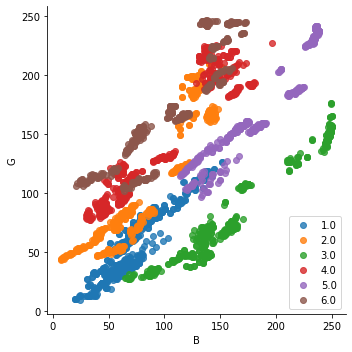

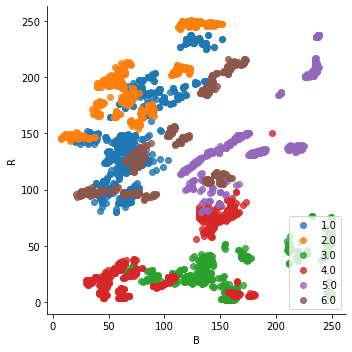

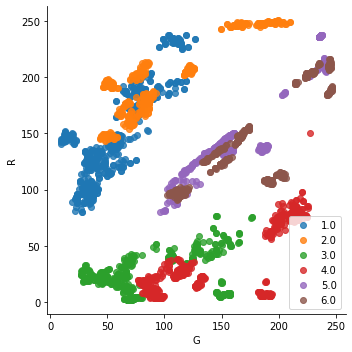

In [4]:
#create a subplot
plt.rcParams["figure.figsize"] = (10,10)
#fig, ax = plt.subplots(3)

#ax[0].scatter(color_data['B'], color_data['Color'], c='Color')
#z = np.polyfit(consumption_merged_data['Minimum temperature (°C)'], consumption_merged_data['CONSUMPTION'],2)
#curve = np.array(z)
#x = np.linspace(min(consumption_merged_data['Minimum temperature (°C)']),max(consumption_merged_data['Minimum temperature (°C)']),30)
#y = [np.polyval(curve, i) for i in x]
#ax[0].plot(x,y, 'r', linewidth = 6)

"""
sns.lmplot( x="B", y="Color", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')

sns.lmplot( x="G", y="Color", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')

sns.lmplot( x="R", y="Color", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')
"""

sns.lmplot( x="B", y="G", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')

sns.lmplot( x="B", y="R", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')

sns.lmplot( x="G", y="R", data=color_data, fit_reg=False, hue='Color', legend=False)
plt.legend(loc='lower right')


plt.show()
plt.close()

C:\Users\kevin\AppData\Local\Temp\ipykernel_11592\442741753.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig) # Method 1


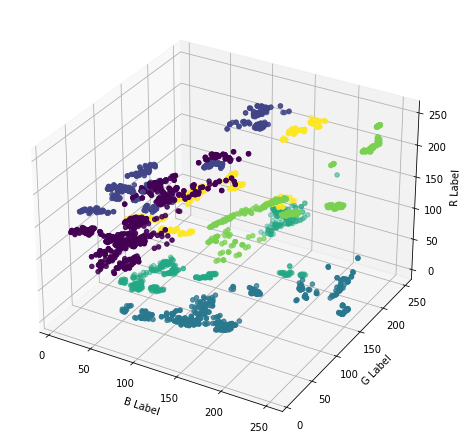

In [5]:
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

ax.scatter(color_data["B"], color_data["G"], color_data["R"], c=color_data["Color"], marker='o')
ax.set_xlabel('B Label')
ax.set_ylabel('G Label')
ax.set_zlabel('R Label')

plt.show()

### Correlation in Normalized Mutual Information

In [6]:
equal_width = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
#plot the discrete data 
discrete_data = color_data.copy()
for name in color_data:
    
    discrete_data[name] = equal_width.fit_transform(color_data[[name]])

corr = discrete_data.corr(method=normalized_mutual_info_score)
corr.style.background_gradient(cmap='coolwarm')

,B,G,R,Color
B,1.000000,0.325905,0.284045,0.227907
G,0.325905,1.000000,0.390173,0.293992
R,0.284045,0.390173,1.000000,0.388622
Color,0.227907,0.293992,0.388622,1.000000


### Shuffle the dataframe before split into test and train data\

In [7]:
color_data = color_data.sample(frac = 1)
color_data = color_data.reset_index(drop=True)
color_data = color_data.astype({"Color": 'int'})
color_data.head()

,B,G,R,Color
0,134.013351,111.801309,229.049738,1
1,30.990807,83.102118,17.053157,4
2,202.232037,203.222706,184.252255,5
3,135.024884,220.782882,73.802844,4
4,128.899337,109.121011,194.905657,1


In [8]:
features = ['B', 'G', 'R']

X_feature = color_data[features]
target = color_data['Color']

X_train, X_test, Y_train, Y_test = train_test_split(X_feature, target, test_size = 0.3, random_state = 20)

### K-NN Regression

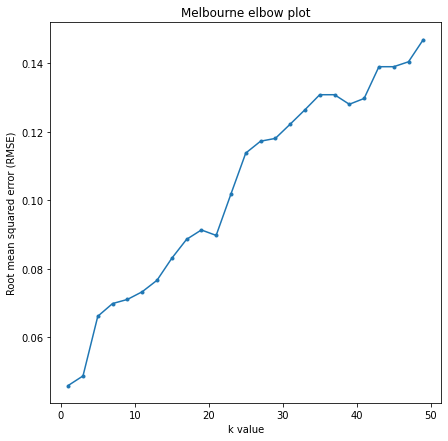

In [9]:
RMSE = []
for k in range(1,51,2):
    color_model = KNeighborsClassifier(n_neighbors=k)
    color_model.fit(X_train,Y_train)
    rmse = -cross_val_score(color_model, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)
    RMSE.append(np.mean(rmse))

#create a subplot
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()

k = [i for i in range(1,51,2)]

ax.plot(k,RMSE, ".-")
ax.set_xlabel("k value")
ax.set_ylabel("Root mean squared error (RMSE)")
ax.set_title("Melbourne elbow plot")

#plt.savefig("melb_elbow.png")
plt.show()
plt.close()

In [10]:
color_model = KNeighborsClassifier(n_neighbors=7)
color_model.fit(X_train.values,Y_train)

y_predict = color_model.predict(X_test)


print('r2: ' , metrics.r2_score(Y_test, y_predict))
RMSE = math.sqrt(metrics.mean_squared_error(Y_test, y_predict))
print("RMSE: ",  RMSE)
print("Percentage of RMSE compare to average of actual value: ", round((RMSE/np.mean(Y_test))*100), "%")
MAE = metrics.mean_absolute_error(Y_test, y_predict)
print("MAE: ", MAE)
print("Percentage of error compare to average of actual value: ", round((MAE/np.mean(Y_test))*100), "%")

r2:  0.9986499151375229
RMSE:  0.06506000486323554
Percentage of RMSE compare to average of actual value:  2 %
MAE:  0.004232804232804233
Percentage of error compare to average of actual value:  0 %


d:\naie\workshop2\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [11]:
y_predict

array([5, 1, 6, 6, 1, 1, 6, 5, 4, 1, 3, 6, 4, 6, 1, 4, 5, 3, 3, 1, 6, 6,
       5, 6, 4, 3, 2, 3, 1, 3, 1, 5, 5, 5, 1, 6, 3, 6, 1, 3, 5, 2, 1, 2,
       3, 3, 1, 1, 1, 2, 4, 4, 2, 3, 1, 3, 1, 3, 5, 4, 4, 2, 5, 2, 6, 1,
       6, 4, 5, 3, 5, 2, 6, 5, 3, 6, 2, 4, 6, 3, 4, 3, 2, 1, 5, 6, 4, 2,
       4, 1, 3, 1, 6, 6, 6, 4, 4, 6, 2, 2, 3, 6, 1, 3, 1, 1, 1, 3, 3, 1,
       5, 2, 1, 4, 6, 3, 2, 1, 1, 1, 5, 6, 5, 1, 6, 2, 3, 4, 1, 1, 5, 1,
       5, 1, 6, 5, 1, 5, 4, 6, 3, 2, 1, 2, 3, 6, 1, 6, 1, 5, 6, 2, 4, 1,
       5, 1, 2, 1, 6, 3, 4, 4, 3, 2, 5, 6, 3, 4, 1, 3, 6, 4, 2, 6, 3, 3,
       4, 6, 6, 4, 1, 3, 6, 3, 3, 3, 2, 5, 1, 6, 2, 1, 1, 3, 1, 1, 2, 5,
       2, 1, 1, 2, 4, 3, 6, 6, 5, 3, 4, 1, 1, 5, 4, 3, 2, 3, 5, 6, 2, 4,
       4, 1, 3, 4, 1, 2, 2, 5, 4, 2, 1, 6, 3, 5, 1, 6, 3, 5, 1, 3, 3, 5,
       4, 6, 5, 2, 1, 4, 5, 1, 3, 6, 5, 6, 4, 4, 4, 4, 3, 1, 5, 6, 3, 2,
       1, 1, 6, 4, 1, 1, 2, 1, 5, 4, 1, 1, 5, 6, 2, 3, 5, 2, 3, 4, 3, 1,
       3, 2, 6, 3, 2, 1, 5, 3, 6, 1, 2, 3, 1, 4, 2,

In [12]:
Y_test

155     5
1628    1
2594    6
2648    6
2603    1
       ..
2393    6
110     6
1229    6
2264    3
2873    2
Name: Color, Length: 945, dtype: int32

### SVM classifier

In [13]:
svm_color_model = NuSVC(decision_function_shape = 'ovo')
svm_color_model.fit(X_train.values,Y_train)

y_predict = svm_color_model.predict(X_test)


print('r2: ' , metrics.r2_score(Y_test, y_predict))
RMSE = math.sqrt(metrics.mean_squared_error(Y_test, y_predict))
print("RMSE: ",  RMSE)
print("Percentage of RMSE compare to average of actual value: ", round((RMSE/np.mean(Y_test))*100), "%")
MAE = metrics.mean_absolute_error(Y_test, y_predict)
print("MAE: ", MAE)
print("Percentage of error compare to average of actual value: ", round((MAE/np.mean(Y_test))*100), "%")

d:\naie\workshop2\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but NuSVC was fitted without feature names
  warnings.warn(


r2:  0.9756984724754127
RMSE:  0.2760262237369417
Percentage of RMSE compare to average of actual value:  8 %
MAE:  0.05502645502645503
Percentage of error compare to average of actual value:  2 %


### Decision Tree

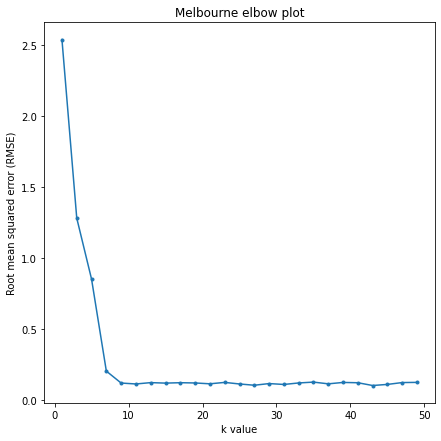

In [14]:
RMSE = []
for k in range(1,51,2):
    decision_color_model = DecisionTreeClassifier(max_depth=k)
    decision_color_model.fit(X_train,Y_train)
    rmse = -cross_val_score(decision_color_model, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)
    RMSE.append(np.mean(rmse))

#create a subplot
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()

k = [i for i in range(1,51,2)]

ax.plot(k,RMSE, ".-")
ax.set_xlabel("k value")
ax.set_ylabel("Root mean squared error (RMSE)")
ax.set_title("Melbourne elbow plot")

#plt.savefig("melb_elbow.png")
plt.show()
plt.close()

In [15]:
decision_color_model = DecisionTreeClassifier(max_depth=13)
decision_color_model.fit(X_train.values,Y_train)

y_predict = decision_color_model.predict(X_test)


print('r2: ' , metrics.r2_score(Y_test, y_predict))
RMSE = math.sqrt(metrics.mean_squared_error(Y_test, y_predict))
print("RMSE: ",  RMSE)
print("Percentage of RMSE compare to average of actual value: ", round((RMSE/np.mean(Y_test))*100), "%")
MAE = metrics.mean_absolute_error(Y_test, y_predict)
print("MAE: ", MAE)
print("Percentage of error compare to average of actual value: ", round((MAE/np.mean(Y_test))*100), "%")

r2:  0.9942621393344725
RMSE:  0.1341246360271594
Percentage of RMSE compare to average of actual value:  4 %
MAE:  0.015873015873015872
Percentage of error compare to average of actual value:  0 %


d:\naie\workshop2\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Test Classifier

In [16]:
def get_mean_value(contours,src_img):
    #creating the mask from the contour
    contour_mask = np.zeros(src_img.shape, src_img.dtype)
    cv2.drawContours(contour_mask, contours, -1, (255, 255, 255), -1)

    contour_mask = cv2.cvtColor(contour_mask, cv2.COLOR_BGR2GRAY)

    #taking all the pixel from the src image within the mask
    result = cv2.bitwise_and(src_img, src_img, mask=contour_mask)
    contour_mean = cv2.mean(src_img, contour_mask)

    return contour_mean

def color_to_text(value):
    if value == 1:
        return "R"
    if value == 2:
        return "O"
    if value == 3:
        return "B"
    if value == 4:
        return "G"
    if value == 5:
        return "W"
    if value == 6:
        return "Y"
    
    

def sort_face(points_list):
    points_list.sort(key = lambda point : point[1])
    result = ""

    for i in range(0, len(points_list), 3):

        
        array_sorting_x = []

        for j in range(i, i + 3):
            array_sorting_x.append(points_list[j])

        array_sorting_x.sort(key= lambda point : point[0])

        for k in array_sorting_x:
            result += k[2]

        #result += '\n'
    return result
    

In [17]:
#f, axarr = plt.subplots(2,2, figsize=(15, 15))
LOWER_AREA_THRESHOLD = 3000
UPPER_AREA_THRESHOLD = 10000

color_order = ['W', 'B', 'R', 'Y', 'G', 'O']
next_center = 0
current_center = 0
state = []
current_face = []
prev_face = []

camera = cv2.VideoCapture(0)
#frame1 = cv2.imread('test_4.jpg')

while True:
    ret, frame1 = camera.read()

    original_frame = frame1.copy()

    #convert to gray image for image processing
    gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    cv2.imshow("original", gray)
    #axarr[0,0].imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

    #bluring an image
    gray = cv2.GaussianBlur(gray, (7, 7), 0)

    #getting the value from the trackbar for the canny function
    #canny_1 = cv2.getTrackbarPos('canny-1', 'image')
    #canny_2 = cv2.getTrackbarPos('canny-2', 'image')

    #run canny function for edge detection
    # 20 40
    gray = cv2.Canny(gray, 20, 50)

    #image dilation
    gray = cv2.dilate(gray, (5, 5), iterations=1)

    cv2.imshow("canny", gray)
    #axarr[0,1].imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))




    # contours, hierarchy = cv2.findContours(gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    i = 0
    contour_id = 0
    # print(len(contours))
    count = 0

    correct_contour = []

    for contour in contours:
        A1 = cv2.contourArea(contour)
        contour_id = contour_id + 1

        if A1 < UPPER_AREA_THRESHOLD and A1 > LOWER_AREA_THRESHOLD:
            perimeter = cv2.arcLength(contour, True)
            epsilon = 0.01 * perimeter
            approx = cv2.approxPolyDP(contour, epsilon, True)
            hull = cv2.convexHull(contour)
            if cv2.norm(((perimeter / 4) * (perimeter / 4)) - A1) < 2000:
                # if cv2.ma
                count = count + 1
                x, y, w, h = cv2.boundingRect(contour)
                # cv2.rectangle(bgr_image_input, (x, y), (x + w, y + h), (0, 255, 255), 2)
                # cv2.imshow('cutted contour', bgr_image_input[y:y + h, x:x + w])
                val = (50 * y) + (10 * x)
                blob_color = np.array(cv2.mean(frame1[y:y + h, x:x + w])).astype(int)
                #print(get_mean_value([contour], frame1))
                correct_contour.append(contour)

                cv2.drawContours(frame1, [contour], 0, (255, 255, 0), 2)
                cv2.drawContours(frame1, [approx], 0, (255, 255, 0), 2)
    
    points_list = []
    
    for contour in correct_contour:
        mean = get_mean_value([contour], original_frame)

        predict = color_model.predict([[mean[0], mean[1], mean[2]]])
        #print(predict)

        color = color_to_text(predict[0])

        M = cv2.moments(contour)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            
            points_list.append((cx, cy, color))

            cv2.circle(frame1, (cx, cy), 7, (0, 0, 255), -1)
            cv2.putText(frame1, color, (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 255), 3)
            
    if len(points_list) == 9:
        current_face = sort_face(points_list)
        
        if current_face[4] == color_order[current_center]:
            prev_face = current_face
            print(current_face)
            
            
    if cv2.waitKey(1) == 32:
        print("recorded " + color_order[current_center])
        state += prev_face
        current_center += 1 
        
        if current_center == len(color_order):
                break

    cv2.imshow("camera", frame1)

    if cv2.waitKey(1) == ord('q'):
        break


print(state)
camera.release()
cv2.destroyAllWindows()




#
#axarr[1,0].imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
#axarr[1,1].imshow(image_datas[3])

plt.show()
plt.close()


WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
WWWWWWWWW
[]


In [18]:
camera.release()

In [19]:
state

[]

In [20]:
import kociemba

cubestring = ''
for i in state:
    cubestring += i

state = cubestring
    
    
state = state.replace('W', 'U')
state = state.replace('R', 'F')
state = state.replace('B', 'R')
state = state.replace('G', 'L')
state = state.replace('Y', 'D')
state = state.replace('O', 'B')

solve_code = kociemba.solve(state)

ValueError: Error. Probably cubestring is invalid

In [ ]:
import serial
import time

ser = serial.Serial(port='COM9', baudrate=115200, timeout=1000)

#solve_code = solve_code.split(" ")
while True:
    x = input()
    if x == "solve":
        ser.write(bytes(solve_code,'utf-8'))
        time.sleep(5)

#ser.write(bytes(solve_code, 'utf-8'))
#ser.write("U".encode('utf-8'))
#time.sleep(5)

#ser.close()

In [ ]:
ser.close()

In [ ]:
def back(*args):
    pass

cv2.namedWindow("Frame")
#cv2.createButton("Back",back)



camera1 = cv2.VideoCapture(0)
while True:
    ret, frame = camera1.read()
    frame = cv2.copyMakeBorder(frame, 100, 200, 100, 100, cv2.BORDER_CONSTANT, None, value = (255,255,255))

    cv2.imshow("Frame", frame)

    
    if cv2.waitKey(1) == ord('q'):
        break
        
        
        
camera1.release()
cv2.destroyAllWindows()




In [ ]:
cv2.destroyAllWindows()

In [ ]:
camera1.release()